# <center>Project-Based Assignment</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Asyafa Ditra Al Hauna - 21102116
2. Landewank Fahreza Firdaus - 21102120
3. Suryani Dewi Wulandari - 21102119

# Latar Belakang

# **Latar Belakang Data**
Bike sharing systems adalah generasi baru dari penyewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembalian sepeda menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikannya di posisi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran penting mereka dalam masalah lalu lintas, lingkungan dan kesehatan.

Terlepas dari aplikasi dunia nyata yang menarik dari  Bike sharing systems, karakteristik data yang dihasilkan oleh sistem ini membuatnya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan dan kedatangan secara eksplisit dicatat dalam sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi jaringan sensor virtual yang dapat digunakan untuk mengukur mobilitas di kota. Dengan demikian, diharapkan sebagian besar kejadian penting di kota dapat dideteksi melalui pemantauan data ini.

# **Tujuan Pengembangan Model**
Tujuan pengembangan model terkait dengan dataset Bike sharing systems adalah untuk memprediksi jumlah penyewaan sepeda pada suatu waktu

Dataset : https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset


# Ringkasan Metode
Dalam tugas besar ini alur metode adalah sebagai berikut:
1. Mencari informasi metadata
2. Exploratory Data Analysis
3. Data Preprocessing
4. One Hot Encoding
5. Data Splitting
6. Konversi data ke tensor dan setup GPU
7. Mengembangkan 3 skema model

## Dependencies

In [ ]:
!pip install ucimlrepo -q
!pip install scipy -q

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
%cd '/content/drive/MyDrive/Tubes ML'

/content/drive/MyDrive/Tubes ML


## Mencari Informasi Data

In [ ]:
# fetch dataset
bike_sharing = fetch_ucirepo(id=275)

In [ ]:
# menentukan panjang maksimal untuk formating
max_key_length = max(len(key) for key in bike_sharing.metadata.keys())

# menampilkan metadata
for i in bike_sharing.metadata.keys():
    print(f"{i.ljust(max_key_length)} : {bike_sharing.metadata[i]}")

uci_id                   : 275
name                     : Bike Sharing
repository_url           : https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset
data_url                 : https://archive.ics.uci.edu/static/public/275/data.csv
abstract                 : This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.
area                     : Social Science
tasks                    : ['Regression']
characteristics          : ['Multivariate']
num_instances            : 17389
num_features             : 13
feature_types            : ['Integer', 'Real']
demographics             : []
target_col               : ['cnt']
index_col                : ['instant']
has_missing_values       : no
missing_values_symbol    : None
year_of_dataset_creation : 2013
last_updated             : Sun Mar 10 2024
dataset_doi              : 10.24432/C5W894
creators                 : ['Had

In [ ]:
# menampilkan latar belakang dataset
print(bike_sharing.metadata.additional_info.summary)

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that mo

In [ ]:
# menampilkan informasi mengenai fitur-fitur dataset
print(bike_sharing.metadata.additional_info.variable_info)

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:winter, 2:spring, 3:summer, 4:fall)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
	- atemp: Normalized feeling temperature in Celsius. The values are deriv

In [ ]:
# menampilkan informasi tipe data dan melihat apakah terdapat missing value
df = bike_sharing.data.original
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# melihat statistik deskriptif data original
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
df.columns = ['instant', 'date day', 'season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

In [ ]:
# mengubah kolom bertipe int menjadi category
cols = ['season','year', 'month','hour','holiday','weekday','workingday','weather']

for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   date day    17379 non-null  object  
 2   season      17379 non-null  category
 3   year        17379 non-null  category
 4   month       17379 non-null  category
 5   hour        17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weather     17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  humidity    17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  count       17379 non-null  int64   
dtypes: category(8), float64(4), int64(4), object(1)
memory usage: 1.3+ MB


## Exploratory Data Analysis

In [ ]:
# banyaknya data selama dua tahun dari 2011 hingga 2012 perharinya
len(df['date day'].unique())

731

In [ ]:
# melihat data dimana dalam satu hari terdapat 24 data
len(df[df['date day'] == '2011-01-01'])

24

In [ ]:
# menghapus kolom yang tidak akan digunakan untuk EDA
df = df.drop(columns=['instant', 'date day', 'year'])

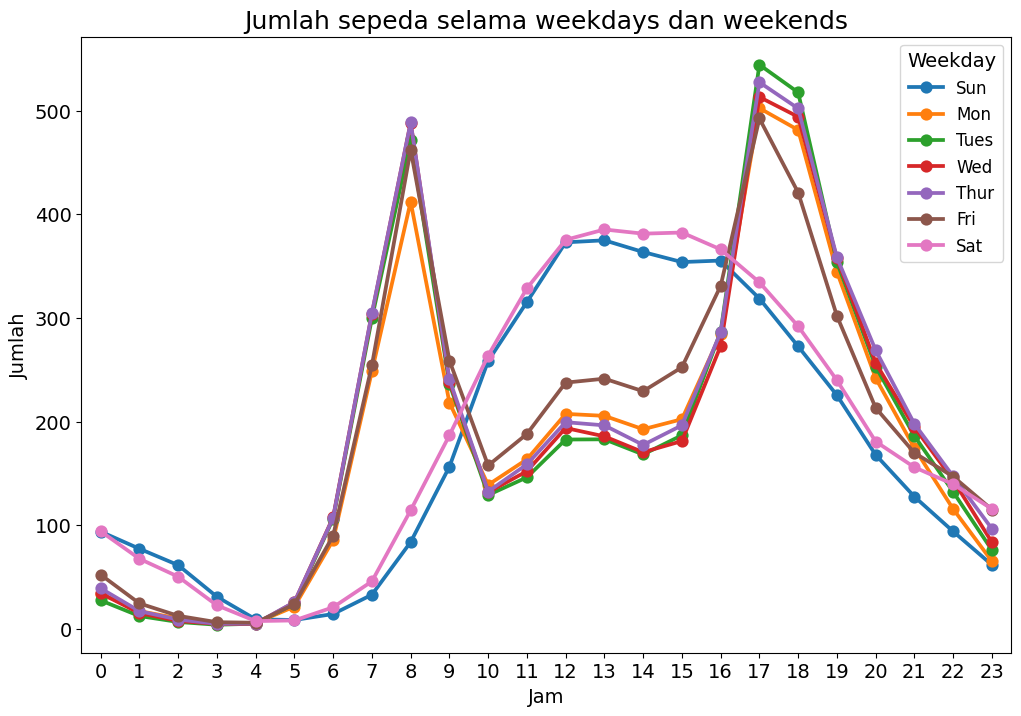

In [ ]:
# membuat plot yang menampilkan jumlah seluruh penyewaan sepeda selama weekdays dan weekends
fig, ax = plt.subplots(figsize=(12,8))
sns.pointplot(data=df, x='hour', y='count', hue='weekday', ax=ax, errorbar=None)

# mengatur ukuran tulisan pada judul, sumbu x, dan sumbu y
ax.set_title('Jumlah sepeda selama weekdays dan weekends', fontsize=18)
ax.set_xlabel('Jam', fontsize=14)
ax.set_ylabel('Jumlah', fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(title='Weekday', fontsize=12, title_fontsize=14)

# Mengkustomisasi legenda
weekday_labels = ['Sun', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, weekday_labels, title='Weekday', fontsize=12, title_fontsize=14)

plt.show()

hasil analisis:
- Pada hari kerja puncak penyewaan waktu pagi terjadi di rentang jam 7 AM - 9 AM
- Pada hari libur di tengah hari antara jam 11 AM hingga jam 3 PM angka penyewaan sepeda relatif tinggi
- Pada hari kerja puncak penyewaan waktu sore terjadi di rentang jam 5 PM hingga 7 PM
- Pada rentang waktu malam hingga dini hari yaitu 10 PM hingga 6 AM angka penyewaan sepeda menurun hampir mendekati 0

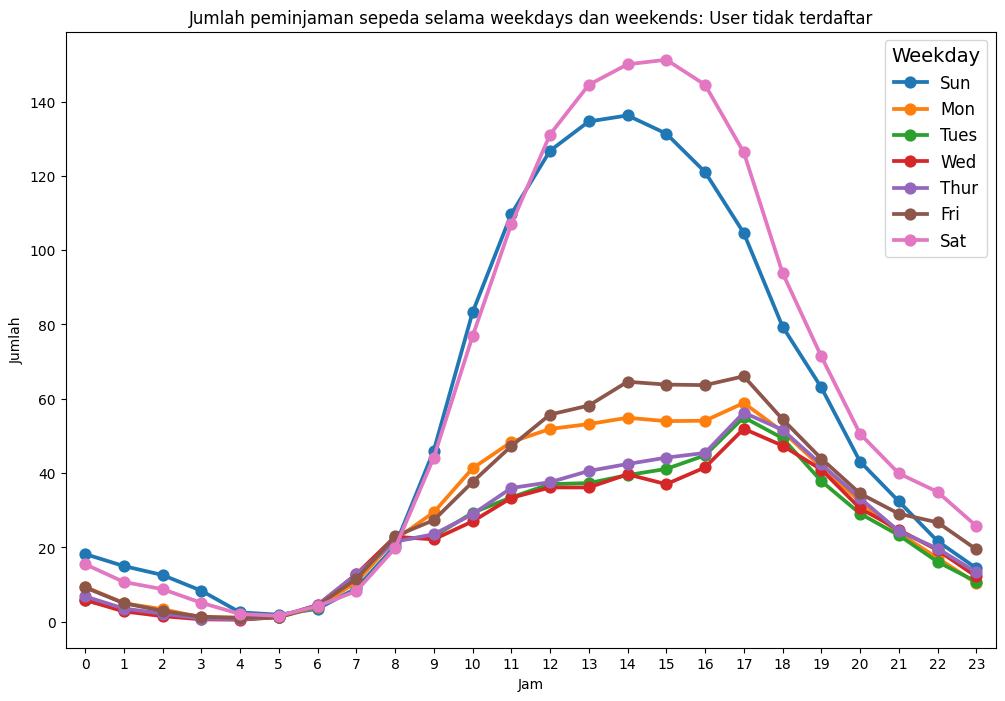

In [ ]:
# Menampilkan plot jumlah penyewaan sepeda selama weekdays dan weekends oleh pengguna tidak terdaftar
fig, ax = plt.subplots(figsize=(12,8))
sns.pointplot(data=df, x='hour', y='casual', hue='weekday', ax=ax, errorbar=None)
ax.set(title='Jumlah penyewaan sepeda selama weekdays dan weekends: User tidak terdaftar', xlabel='Jam', ylabel='Jumlah')

# Mengkustomisasi legenda
weekday_labels = ['Sun', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, weekday_labels, title='Weekday', fontsize=12, title_fontsize=14)

plt.show()

Hasil Analisis
- Peningkatan angka penyewaan sepeda oleh user terdaftar pada hari libur relatif tinggi pada rentang waktu jam 9 pagi hingga jam 8 malam
- Angka penyewaan sepeda pada hari kerja oleh user tidak terdafdar relatif rendah dan terjadi di rentang waktu jam 9 pagi hingga jam 5 sore, terindikasi waktu berangkat kerja dan pulang kerja

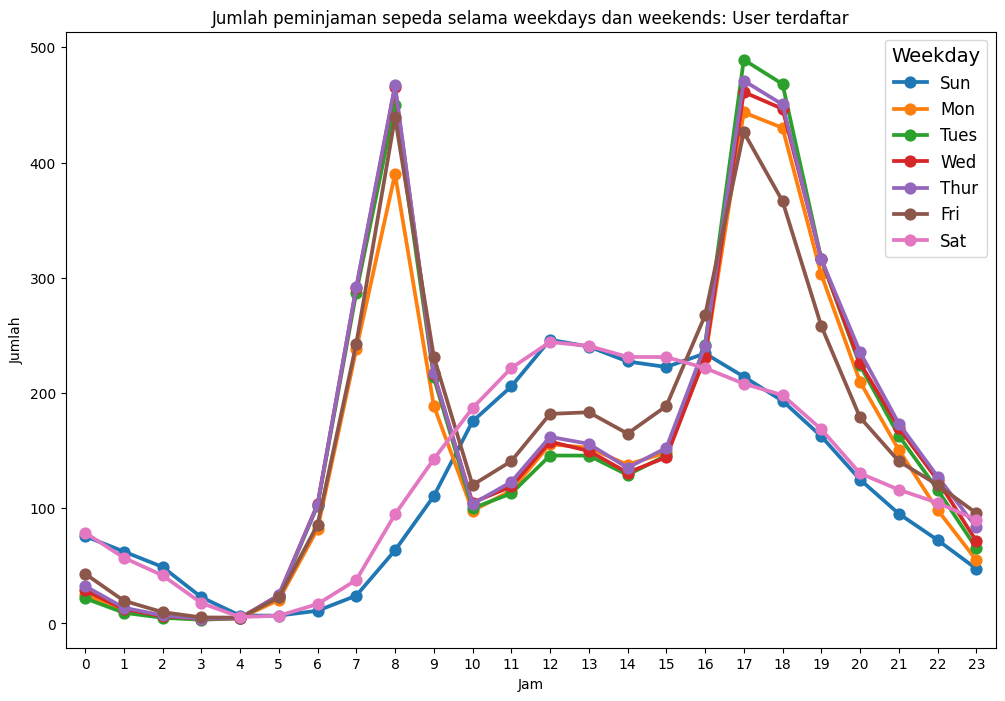

In [ ]:
# Menampilkan plot jumlah penyewaan sepeda selama weekdays dan weekends oleh pengguna terdaftar
fig, ax = plt.subplots(figsize=(12,8))
sns.pointplot(data=df, x='hour', y='registered', hue='weekday', ax=ax, errorbar=None)
ax.set(title='Jumlah penyewaan sepeda selama weekdays dan weekends: User terdaftar', xlabel='Jam', ylabel='Jumlah')

# Mengkustomisasi legenda
weekday_labels = ['Sun', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, weekday_labels, title='Weekday', fontsize=12, title_fontsize=14)

plt.show()

Hasil Analisis
- pada hari kerja user terdaftar melakukan penyewaan pada rentang waktu jam 7 pagi hingga jam 9 pagi
- pada hari kerja angka penyewaan sepeda relatif rendah dan stagnan selama waktu tengah hari dalam rentang waktu jam 11 am hingga jam 3 pm
- pada hari libur user terdaftar relatif melakukan penyewaan pada waktu pagi hingga malam hari yaitu jam 7 pagi hingga jam 11 malam

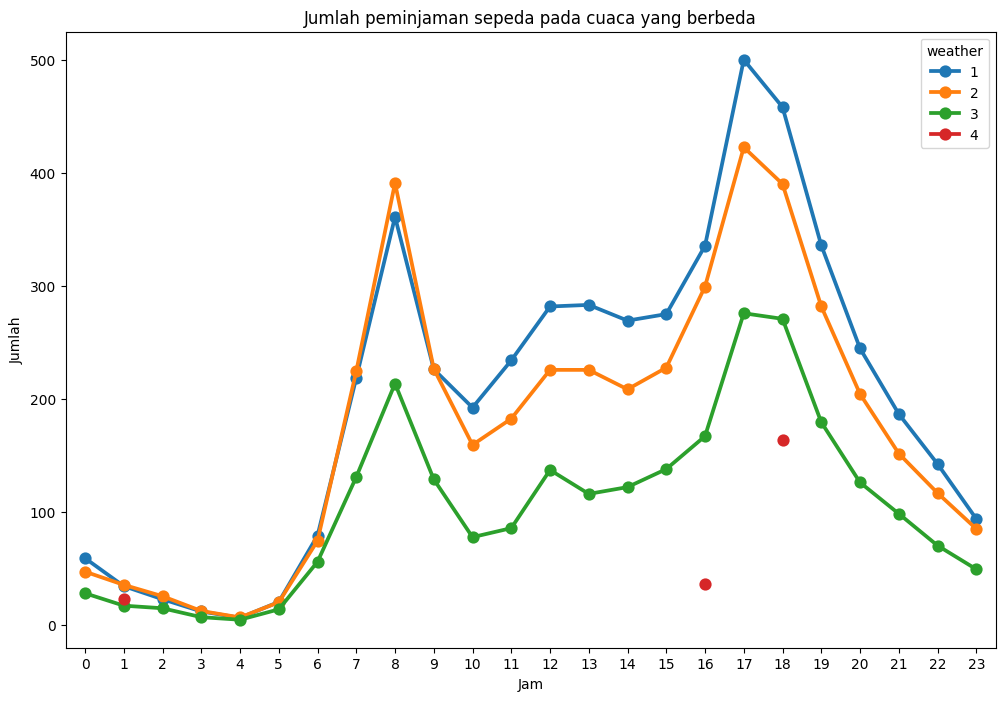

In [ ]:
# Menampilkan plot jumlah penyewaan sepeda berdasarkan musim
fig, ax = plt.subplots(figsize=(12,8))
sns.pointplot(data=df, x='hour', y='count', hue='weather', ax=ax, errorbar=None)
ax.set(title='Jumlah penyewaan sepeda pada cuaca yang berbeda', xlabel='Jam', ylabel='Jumlah')

plt.show()


- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
df['weather'].value_counts()

,count
weather,
1,11413
2,4544
3,1419
4,3


Hasil analisis
*   penyewaan sepeda mencapai puncak tertinggi pada jam 8 pagi dan jam 5 sore
*   pada cuaca buruk jumlah penyewaan menggalami penurunan dibandingkan dengan cuaca cerah

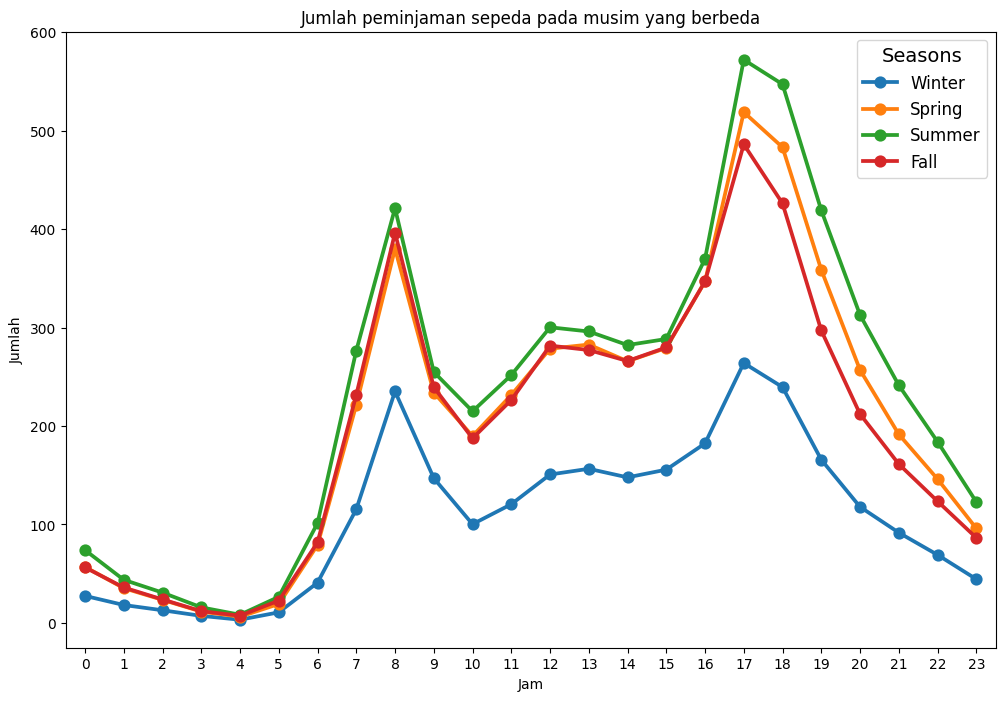

In [ ]:
# Menampilkan plot jumlah penyewaan sepeda pada
fig, ax = plt.subplots(figsize=(12,8))
sns.pointplot(data=df, x='hour', y='count', hue='season', ax=ax, errorbar=None)
ax.set(title='Jumlah penyewaan sepeda pada musim yang berbeda', xlabel='Jam', ylabel='Jumlah')

# Mengkustomisasi legenda
season_labels = ['Winter', 'Spring', 'Summer', 'Fall']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, season_labels, title='Seasons', fontsize=12, title_fontsize=14)

plt.show()

hasil analisis


*   musim panas cenderung memiliki jumlah penyewaan tertinggi.
*   musim ke-3 memiliki jumlah penyewaan tertinggi dibandingkan musim lainnya


*   jumlah penyewaan menurun secara signifikan antara pukul 9 pagi sampai 3 sore





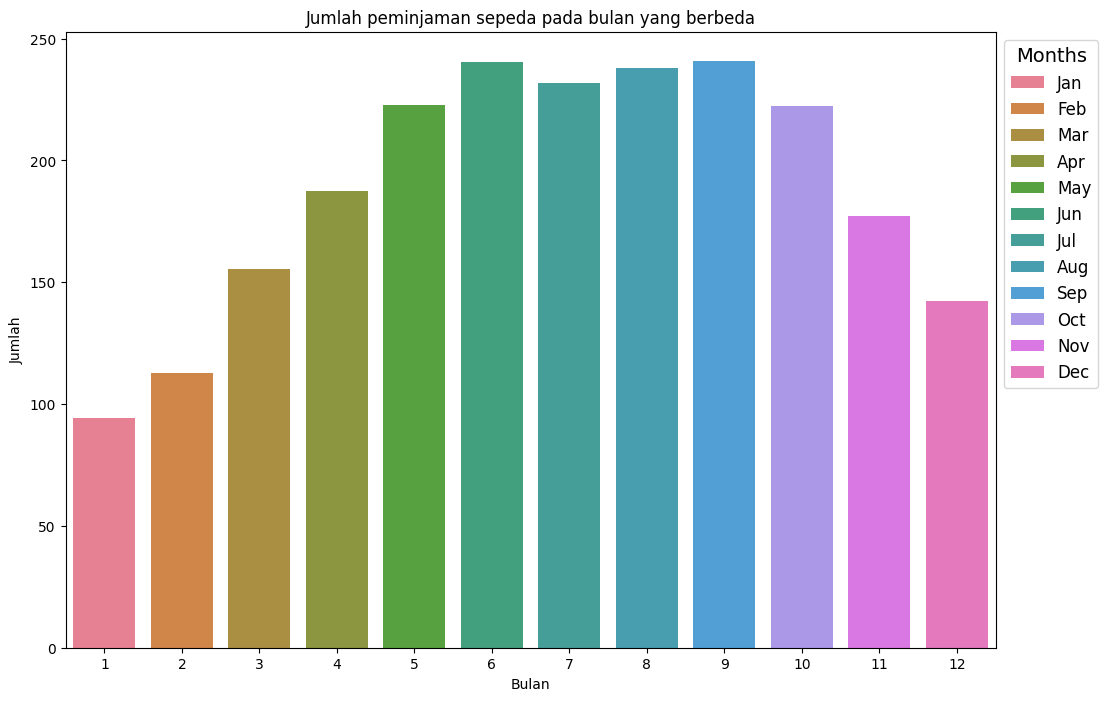

In [ ]:
# menampilkan plot jumlah penyewaan sepeda pada bulan yang berbeda
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df, x='month', y='count', ax=ax, hue='month', errorbar=None)
ax.set(title='Jumlah penyewaan sepeda pada bulan yang berbeda', xlabel='Bulan', ylabel='Jumlah')

# Mengkustomisasi legenda
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, month_labels, title='Months', fontsize=12, title_fontsize=14, bbox_to_anchor=(1, 1))

plt.show()

hasil analisis
*   jumlah penyewaan sepeda tertinggi terjadi antara bulan Mei hingga September
*   bulan Januari dan Desember memiliki jumlah penyewaan terendah


*   jumlah penyewaan mulai menurun signifikan setelah bulan September







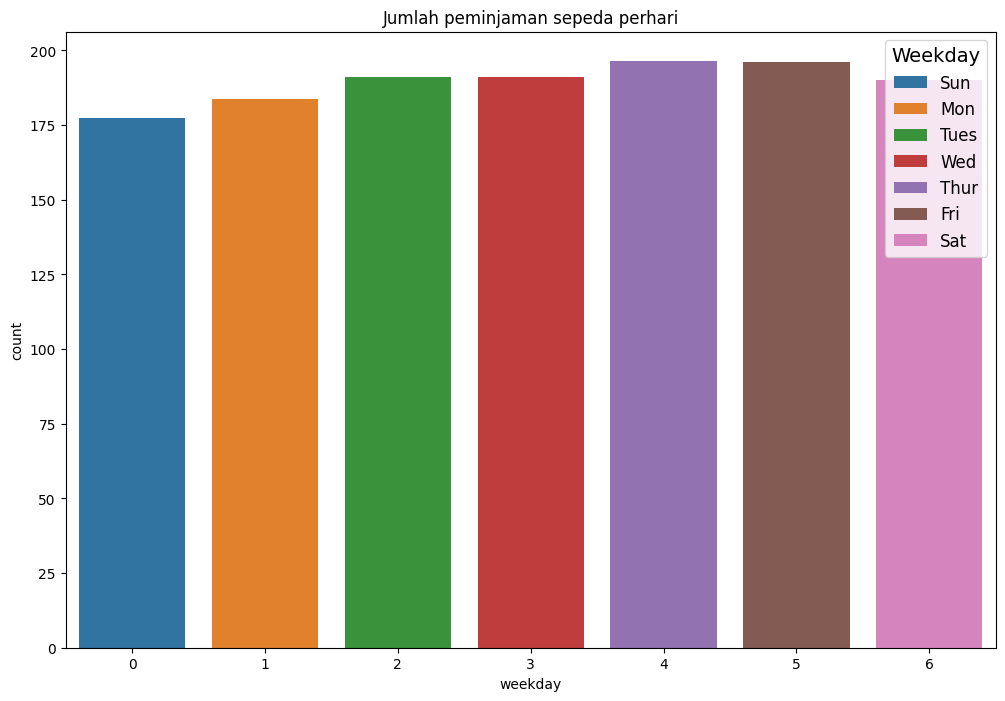

In [ ]:
# menampilkan plot jumlah penyewaan sepeda tiap harinya
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df, x='weekday', y='count', ax=ax, hue='weekday', errorbar=None)
ax.set(title='Jumlah penyewaan sepeda perhari')

# Mengkustomisasi legenda
weekday_labels = ['Sun', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, weekday_labels, title='Weekday', fontsize=12, title_fontsize=14)

plt.show()

hasil analisisi


*   hari 4 & 5 menunjukkan jumlah penyewaan paling tinggi dibandingkan hari 0
*   hari 0 menunjukkan penyewaan paling rendah karena hari libur atau weekend



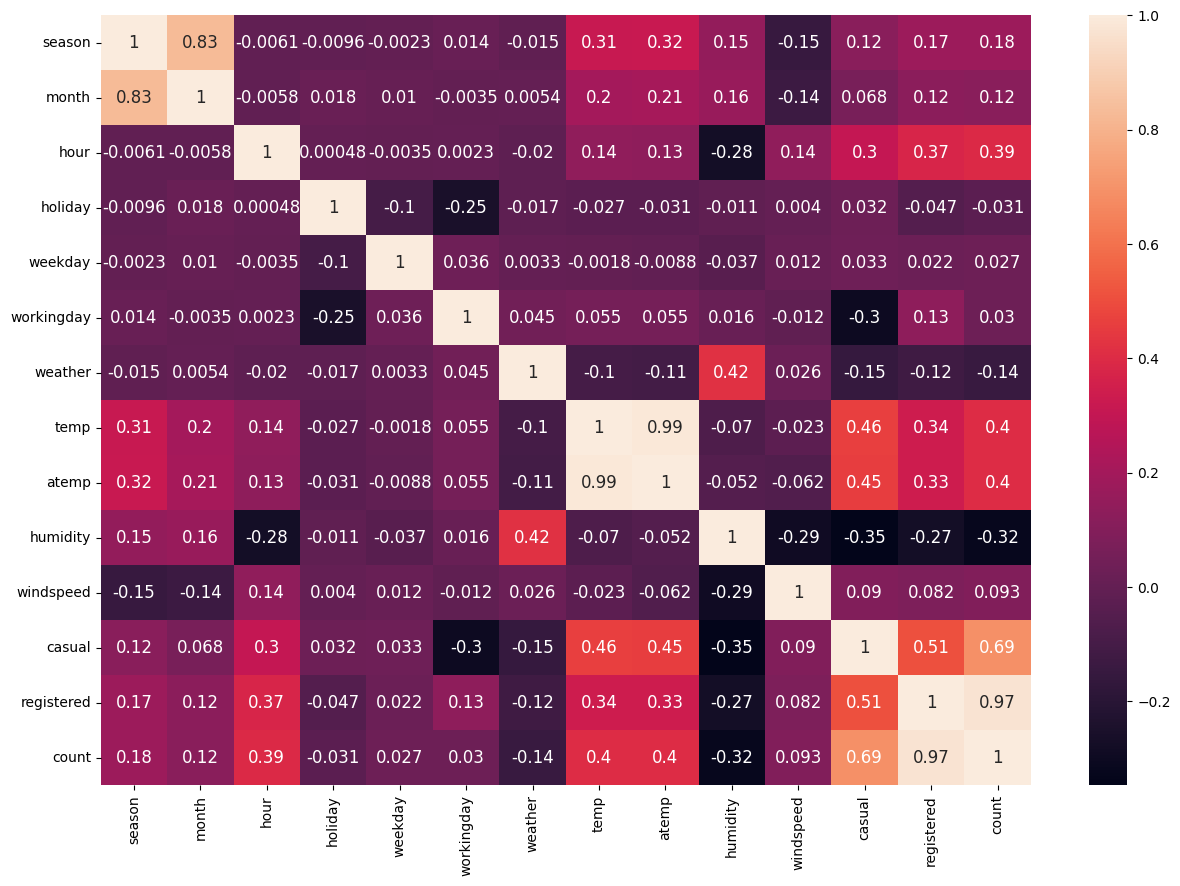

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':12})

plt.show()

hasil analisis


*   jumlah peminjam terdaftar memiliki kontribusi signifikan terhadap total jumlah peminjam ditunjukkan dengan korelasi tertinggi (0.97)
*   cuaca yang hangat berpengaruh positif dalam kenyamanan menggunakan sepeda ditunjukkan dengan korelasi positif kuat (0.69)


*   jam memiliki hubungan signifikan dengan jumlah penyewaan. Jam penyewaan sibuk pada 7 pagi - 9 pagi dan 5 sore - 7 malam. ini berdasarkan pola aktivitas kerja atau sekolah






## Data Preprocessing

In [ ]:
bike_sharing = fetch_ucirepo(id=275)

df = bike_sharing.data.original

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


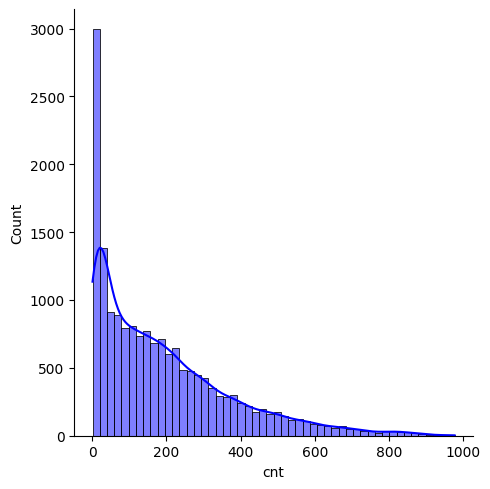

In [ ]:
# sebelum diteraptkan transformasi log
sns.displot(df['cnt'], bins=50, color='blue', kde=True)
plt.show()

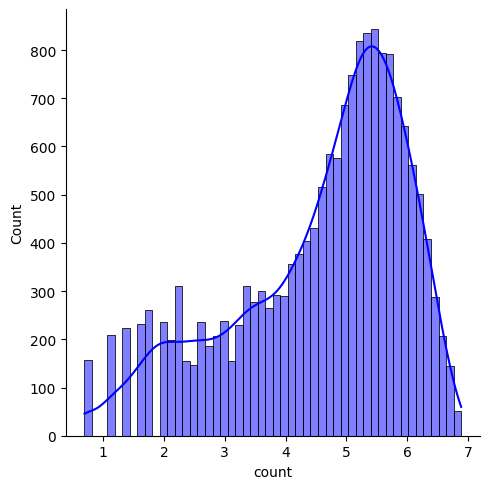

In [ ]:
# setelah diteraptkan transformasi log
df['count'] = np.log1p(df['cnt'])

sns.displot(df['count'], bins=50, color='blue', kde=True)
plt.show()

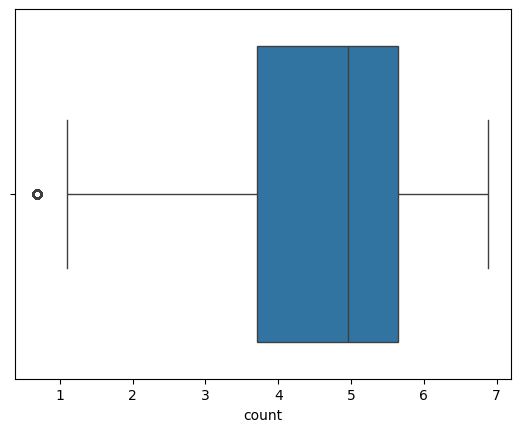

In [ ]:
# sebelum outlier dihilangkan
sns.boxplot(x='count', data=df)
plt.show()

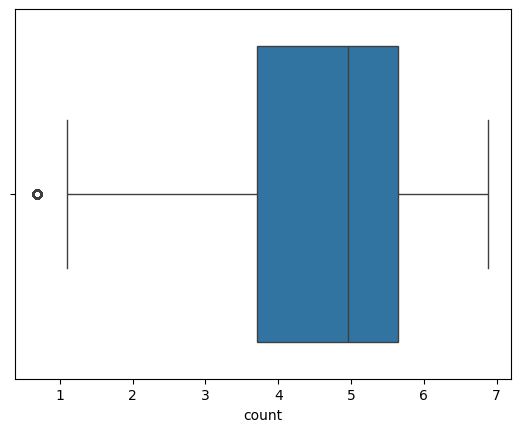

In [ ]:
# menghilangan outlier
z_threshold = 3
z_scores = np.abs((df['count'] - df['count'].mean()) / df['count'].std())
df_no_outliers = df[z_scores < z_threshold]

# menampilkan box plot hasil penghilangan outlier
sns.boxplot(x='count', data=df_no_outliers)
plt.show()

In [ ]:
df_no_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.000000,4345.500000,8690.000000,13034.500000,17379.00000
season,17379.0,2.501640,1.106918,1.000000,2.000000,3.000000,3.000000,4.00000
yr,17379.0,0.502561,0.500008,0.000000,0.000000,1.000000,1.000000,1.00000
mnth,17379.0,6.537775,3.438776,1.000000,4.000000,7.000000,10.000000,12.00000
hr,17379.0,11.546752,6.914405,0.000000,6.000000,12.000000,18.000000,23.00000
holiday,17379.0,0.028770,0.167165,0.000000,0.000000,0.000000,0.000000,1.00000
weekday,17379.0,3.003683,2.005771,0.000000,1.000000,3.000000,5.000000,6.00000
workingday,17379.0,0.682721,0.465431,0.000000,0.000000,1.000000,1.000000,1.00000
weathersit,17379.0,1.425283,0.639357,1.000000,1.000000,1.000000,2.000000,4.00000
temp,17379.0,0.496987,0.192556,0.020000,0.340000,0.500000,0.660000,1.00000


In [ ]:
df_no_outliers.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2.833213
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,3.713572
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,3.496508
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2.639057
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0.693147


## One hot Encoding

In [ ]:
df.drop(columns=['instant'], inplace=True)

In [ ]:
# fungsi untuk melakukan one hot encoding pada data kategorikal
def one_hot_encoding(data: pd.DataFrame, column: str):


    # menambahkan hasil encoding kedalam dataframe secara secara horizontal
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)

    # menghapus data kolom asli
    data = data.drop([column], axis=1)

    for col in data.select_dtypes(include=['bool']).columns:
        data[col] = data[col].astype(int)

    return data

In [ ]:
df_oh = df

cols = ['season','mnth','hr','holiday','weekday','workingday','weathersit']

# loop untuk menerapkan one hot encoding menggunakan fungsi yang telah dibuat
for col in cols:
    df_oh = one_hot_encoding(df_oh, col)
df_oh.head()

,dteday,yr,temp,atemp,hum,windspeed,casual,registered,cnt,count,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,2011-01-01,0,0.24,0.2879,0.81,0.0,3,13,16,2.833213,...,0,0,0,0,0,1,0,0,0,0
1,2011-01-01,0,0.22,0.2727,0.80,0.0,8,32,40,3.713572,...,0,0,0,0,0,1,0,0,0,0
2,2011-01-01,0,0.22,0.2727,0.80,0.0,5,27,32,3.496508,...,0,0,0,0,0,1,0,0,0,0
3,2011-01-01,0,0.24,0.2879,0.75,0.0,3,10,13,2.639057,...,0,0,0,0,0,1,0,0,0,0
4,2011-01-01,0,0.24,0.2879,0.75,0.0,0,1,1,0.693147,...,0,0,0,0,0,1,0,0,0,0


## Data Splitting

In [ ]:
# split train and test
from sklearn.model_selection import train_test_split

X = df_oh.drop(columns=['cnt', 'count', 'casual', 'registered', 'dteday'])
y = df_oh['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12165, 53)
(5214, 53)
(12165,)
(5214,)


In [ ]:
X_train = X_train.head(1000)
X_test = X_test.head(1000)
y_train = y_train.head(1000)
y_test = y_test.head(1000)

## Data to tensor and GPU setup

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)

y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [ ]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

## Metrik RMSLE

In [ ]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

## DL 1

In [ ]:
class model1(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(model1, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model1 = model1(input_size=X_train.shape[1],
                hidden_size=128,
                output_size=1).to(device)

In [ ]:
# loss_fn = nn.L1Loss()
# loss_fn = nn.MSELoss()
loss_fn = nn.SmoothL1Loss()
# loss_fn = nn.HuberLoss()

# optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)
optimizer = torch.optim.Adam(params=model1.parameters(), lr=1e-4)
# optimizer = torch.optim.AdamW(params=model1.parameters(), lr=0.0001)
# optimizer = torch.optim.Adamax(params=model1.parameters(), lr=0.1)
# optimizer = torch.optim.RMSprop(params=model1.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)

epochs = 5000

train_loss, train_rmsle = [], []
inf_loss, test_rmsle = [], []

for epoch in range(epochs):
    model1.train()
    y_pred = model1(X_train).squeeze(dim=1)
    loss = loss_fn(y_pred, y_train)
    acc = rmsle(y_train.cpu().detach().numpy(), y_pred.cpu().detach().numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())
    train_rmsle.append(acc)

    model1.eval()
    with torch.inference_mode():
        test_pred = model1(X_test).squeeze(dim=1)
        test_loss = loss_fn(test_pred, y_test)
        test_acc = rmsle(y_test.cpu().detach().numpy(), test_pred.cpu().detach().numpy())

        inf_loss.append(test_loss.cpu().numpy())
        test_rmsle.append(test_acc)

        if epoch % 1000 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, RMSLE: {acc:.5f} | Test loss: {test_loss:.5f}, Test RMSLE: {test_acc:.5f}")

Epoch: 0 | Loss: 3.95517, RMSLE: 1.62119 | Test loss: 3.96167, Test RMSLE: 1.62175
Epoch: 1000 | Loss: 0.38216, RMSLE: 0.22958 | Test loss: 0.36330, Test RMSLE: 0.21990
Epoch: 2000 | Loss: 0.16478, RMSLE: 0.14107 | Test loss: 0.17551, Test RMSLE: 0.14627
Epoch: 3000 | Loss: 0.08912, RMSLE: 0.10550 | Test loss: 0.10905, Test RMSLE: 0.11668
Epoch: 4000 | Loss: 0.04708, RMSLE: 0.07816 | Test loss: 0.07855, Test RMSLE: 0.10126


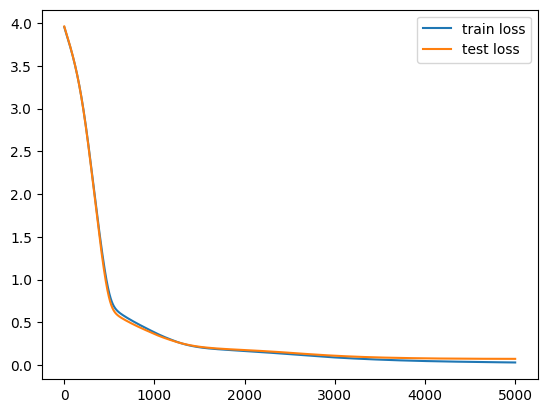

In [ ]:
plt.plot(train_loss, label='train loss')
plt.plot(inf_loss, label='test loss')
plt.legend()
plt.show()

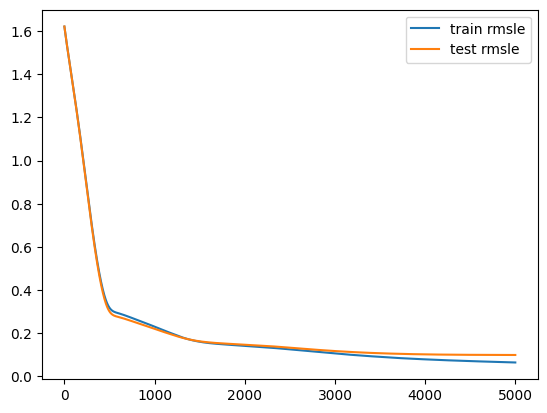

In [ ]:
plt.plot(train_rmsle, label='train rmsle')
plt.plot(test_rmsle, label='test rmsle')
plt.legend()
plt.show()

In [ ]:
model1.eval()
with torch.inference_mode():
    test_pred = model1(X_test).squeeze(dim=1)

    mse = nn.MSELoss()
    mse = mse(test_pred, y_test)

    rmse = nn.MSELoss(reduction='mean')
    rmse = torch.sqrt(rmse(test_pred, y_test))

    mae = nn.L1Loss()
    mae = mae(test_pred, y_test)

    Rmsle = rmsle(y_test.cpu().detach().numpy(), test_pred.cpu().detach().numpy())

    print(f"Model 1 Performance\n\nRMSE : {rmse:.5f}\nMSE : {mse:.5f}\nMAE : {mae:.5f}\nRMSLE : {Rmsle:.5f}")

Model 1 Performance

RMSE : 0.38516
MSE : 0.14835
MAE : 0.28213
RMSLE : 0.09850


## DL 2

In [ ]:
class model2(nn.Module):
    def __init__(self, input_size, output_size):
        super(model2, self).__init__()

        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

model2 = model2(input_size=X_train.shape[1],
                output_size=1).to(device)

In [ ]:
# loss_fn = nn.L1Loss()
# loss_fn = nn.MSELoss()
loss_fn = nn.SmoothL1Loss()
# loss_fn = nn.HuberLoss()

# optimizer = torch.optim.SGD(params=model2.parameters(), lr=0.1)
optimizer = torch.optim.Adam(params=model2.parameters(), lr=1e-4)
# optimizer = torch.optim.AdamW(params=model2.parameters(), lr=1e-4)
# optimizer = torch.optim.Adamax(params=model2.parameters(), lr=1e-4)
# optimizer = torch.optim.RMSprop(params=model2.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)

epochs = 5000

train_loss, train_rmsle = [], []
inf_loss, test_rmsle = [], []

for epoch in range(epochs):
    model2.train()
    y_pred = model2(X_train).squeeze(dim=1)
    loss = loss_fn(y_pred, y_train)
    acc = rmsle(y_train.cpu().detach().numpy(), y_pred.cpu().detach().numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())
    train_rmsle.append(acc)

    model2.eval()
    with torch.inference_mode():
        test_pred = model2(X_test).squeeze(dim=1)
        test_loss = loss_fn(test_pred, y_test)
        test_acc = rmsle(y_test.cpu().detach().numpy(), test_pred.cpu().detach().numpy())

        inf_loss.append(test_loss.cpu().numpy())
        test_rmsle.append(test_acc)

        if epoch % 1000 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, RMSLE: {acc:.5f} | Test loss: {test_loss:.5f}, Test RMSLE: {test_acc:.5f}")

Epoch: 0 | Loss: 4.15162, RMSLE: 1.81750 | Test loss: 4.15674, Test RMSLE: 1.81533
Epoch: 1000 | Loss: 0.16416, RMSLE: 0.14414 | Test loss: 0.18020, Test RMSLE: 0.14782
Epoch: 2000 | Loss: 0.04439, RMSLE: 0.07483 | Test loss: 0.07957, Test RMSLE: 0.10070
Epoch: 3000 | Loss: 0.01720, RMSLE: 0.04459 | Test loss: 0.08115, Test RMSLE: 0.10338
Epoch: 4000 | Loss: 0.00552, RMSLE: 0.02370 | Test loss: 0.08930, Test RMSLE: 0.10821


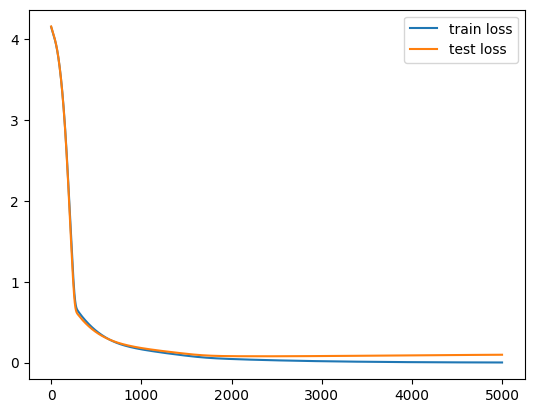

In [ ]:
plt.plot(train_loss, label='train loss')
plt.plot(inf_loss, label='test loss')
plt.legend()
plt.show()

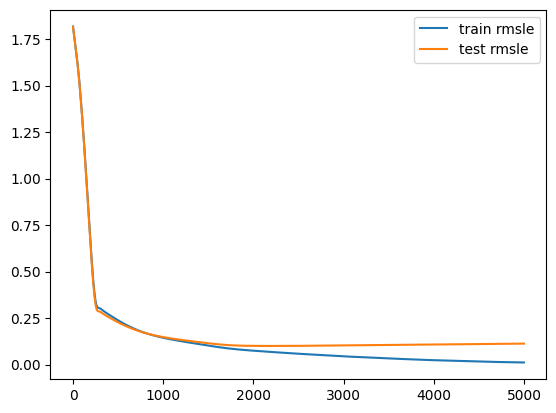

In [ ]:
plt.plot(train_rmsle, label='train rmsle')
plt.plot(test_rmsle, label='test rmsle')
plt.legend()
plt.show()

In [ ]:
model2.eval()
with torch.inference_mode():
    test_pred = model2(X_test).squeeze(dim=1)

    mse = nn.MSELoss()
    mse = mse(test_pred, y_test)

    rmse = nn.MSELoss(reduction='mean')
    rmse = torch.sqrt(rmse(test_pred, y_test))

    mae = nn.L1Loss()
    mae = mae(test_pred, y_test)

    Rmsle = rmsle(y_test.cpu().detach().numpy(), test_pred.cpu().detach().numpy())

    print(f"Model 2 Performance\n\nRMSE : {rmse:.5f}\nMSE : {mse:.5f}\nMAE : {mae:.5f}\nRMSLE : {Rmsle:.5f}")

Model 2 Performance

RMSE : 0.44872
MSE : 0.20135
MAE : 0.32781
RMSLE : 0.11292


## DL 3

In [ ]:
class model3(nn.Module):
    def __init__(self, input_size, output_size):
        super(model3, self).__init__()

        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

model3 = model3(input_size=X_train.shape[1],
                output_size=1).to(device)

In [ ]:
loss_fn = nn.L1Loss()
# loss_fn = nn.MSELoss()
# loss_fn = nn.SmoothL1Loss()
# loss_fn = nn.HuberLoss()

optimizer = torch.optim.SGD(params=model3.parameters(), lr=1e-3)
# optimizer = torch.optim.Adam(params=model3.parameters(), lr=1e-4)
# optimizer = torch.optim.AdamW(params=model3.parameters(), lr=1e-4)
# optimizer = torch.optim.Adamax(params=model3.parameters(), lr=1e-4)
# optimizer = torch.optim.RMSprop(params=model3.parameters(), lr=1e-4)

In [ ]:
torch.manual_seed(42)

epochs = 20000

train_loss, train_rmsle = [], []
inf_loss, test_rmsle = [], []

for epoch in range(epochs):
    model3.train()
    y_pred = model3(X_train).squeeze(dim=1)
    loss = loss_fn(y_pred, y_train)
    acc = rmsle(y_train.cpu().detach().numpy(), y_pred.cpu().detach().numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())
    train_rmsle.append(acc)

    model3.eval()
    with torch.inference_mode():
        test_pred = model3(X_test).squeeze(dim=1)
        test_loss = loss_fn(test_pred, y_test)
        test_acc = rmsle(y_test.cpu().detach().numpy(), test_pred.cpu().detach().numpy())

        inf_loss.append(test_loss.cpu().numpy())
        test_rmsle.append(test_acc)

        if epoch % 1000 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, RMSLE: {acc:.5f} | Test loss: {test_loss:.5f}, Test RMSLE: {test_acc:.5f}")

Epoch: 0 | Loss: 4.65133, RMSLE: 1.81750 | Test loss: 4.65863, Test RMSLE: 1.81761
Epoch: 1000 | Loss: 1.15441, RMSLE: 0.31827 | Test loss: 1.10854, Test RMSLE: 0.30030
Epoch: 2000 | Loss: 0.94660, RMSLE: 0.31218 | Test loss: 0.93240, Test RMSLE: 0.29813
Epoch: 3000 | Loss: 0.83944, RMSLE: 0.29162 | Test loss: 0.83548, Test RMSLE: 0.28073
Epoch: 4000 | Loss: 0.74178, RMSLE: 0.26933 | Test loss: 0.75135, Test RMSLE: 0.26078
Epoch: 5000 | Loss: 0.65460, RMSLE: 0.24380 | Test loss: 0.67732, Test RMSLE: 0.23735
Epoch: 6000 | Loss: 0.57821, RMSLE: 0.21717 | Test loss: 0.61265, Test RMSLE: 0.21313
Epoch: 7000 | Loss: 0.51298, RMSLE: 0.19190 | Test loss: 0.55414, Test RMSLE: 0.19023
Epoch: 8000 | Loss: 0.46442, RMSLE: 0.17161 | Test loss: 0.50851, Test RMSLE: 0.17182
Epoch: 9000 | Loss: 0.43404, RMSLE: 0.15804 | Test loss: 0.48116, Test RMSLE: 0.15958
Epoch: 10000 | Loss: 0.41631, RMSLE: 0.15069 | Test loss: 0.46284, Test RMSLE: 0.15261
Epoch: 11000 | Loss: 0.40337, RMSLE: 0.14550 | Test loss

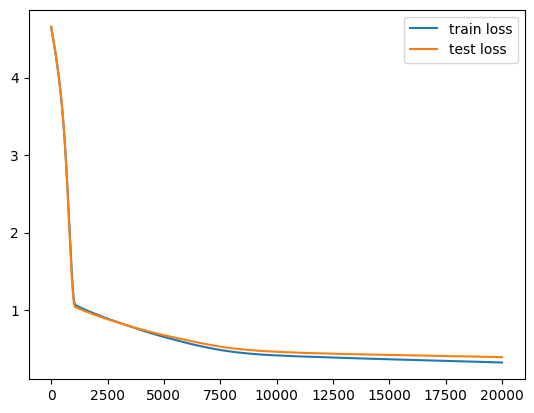

In [ ]:
plt.plot(train_loss, label='train loss')
plt.plot(inf_loss, label='test loss')
plt.legend()
plt.show()

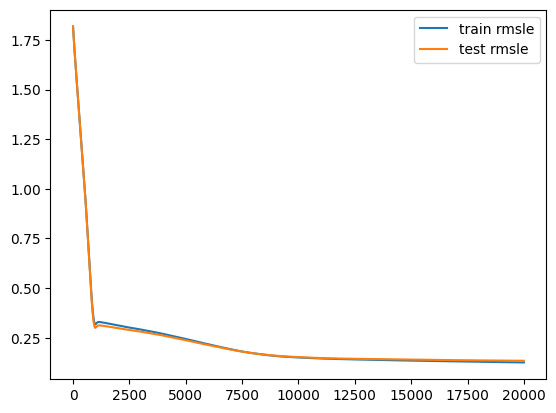

In [ ]:
plt.plot(train_rmsle, label='train rmsle')
plt.plot(test_rmsle, label='test rmsle')
plt.legend()
plt.show()

In [ ]:
model3.eval()
with torch.inference_mode():
    test_pred = model3(X_test).squeeze(dim=1)

    mse = nn.MSELoss()
    mse = mse(test_pred, y_test)

    rmse = nn.MSELoss(reduction='mean')
    rmse = torch.sqrt(rmse(test_pred, y_test))

    mae = nn.L1Loss()
    mae = mae(test_pred, y_test)

    Rmsle = rmsle(y_test.cpu().detach().numpy(), test_pred.cpu().detach().numpy())

    print(f"Model 3 Performance\n\nRMSE : {rmse:.5f}\nMSE : {mse:.5f}\nMAE : {mae:.5f}\nRMSLE : {Rmsle:.5f}")

Model 3 Performance

RMSE : 0.56004
MSE : 0.31364
MAE : 0.39405
RMSLE : 0.13402


# Hasil dan Analisis


**Data Field**


---



| Nama fitur   | Keterangan                                                                                                                                                                   | Jenis Data      |
|--------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------|
| dteday       | date (2011-01-01) format yyyy/mm/dd                                                                                                                                         | Timeseries      |
| Season       | 1:winter, 2:spring, 3:summer, 4:fall                                                                                                                                       | Categorical     |
| yr           | 0: 2011, 1:2012                                                                                                                                                           | Categorical     |
| mnth         | month (1 to 12), 1 januari, 12 desember                                                                                                                                   | Categorical     |
| hr           | hour (0–23)                                                                                                                                                               | Categorical     |
| holiday      | (0 atau 1), 1 libur, 0 tidak libur                                                                                                                                        | Categorical     |
| weekday      | (0–6), 0 minggu, 6 sabtu                                                                                                                                                  | Categorical     |
| workingday   | (0 atau 1), 0 libur, 1 tidak libur                                                                                                                                        | Categorical     |
| weathersit   | (0–4) dengan masing-masing mewakili:                                                                                                                                      | Categorical     |
|              | - 1: Clear, Few clouds, Partly cloudy, Partly cloudy                                                                                                                      |                 |
|              | - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                                                                                         |                 |
|              | - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds                                                                              |                 |
|              | - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                                                                                           |                 |
| temp         | dalam rentang 0 hingga 1 (celcius)                                                                                                                                         | Numerical       |
| atemp        | apparent temperature atau suhu yang lebih merepresentasikan perilaku manusia terkait kenyamanan                                                                       | Numerical       |
| hum          | dalam rentang 0 hingga 1                                                                                                                                                  | Numerical       |
| windspeed    | dalam rentang 0 hingga 1                                                                                                                                                  | Numerical       |
| cnt          | (total bike user, casual and registered)                                                                                                                                  | Numerical       |


**Hasil EDA**


---


- Puncak Angka penyewaan sepeda terjadi dihari kerja khususnya waktu berangkat dan pulang kerja. Sedangkan pada hari libur puncak Angka penyewaan sepeda terjadi pada tengah hari.

- Tercatat user terdaftar lebih sering melakukan penyewaan pada jam kerja dari pada hari libur. sedangkan untuk user tidak terdaftar lebih sering melakukan penyewaan pada saat hari libur.

- Cuaca mempengaruhi angka penyewaan sepeda. berdasarkan data saat terjadi cuaca yang extreme, angka penyewaan sepeda menurun drastis. Sebaliknya pada saat cuaca cerah angka penyewaan terlihat meningkat.

- Karena cuaca yang terjadi pasti terjadi dalam suatu musim yang berkaitan, oleh sebab itu musim juga mempunyai pengaruh pada angka penyewaan sepeda. Tercatat musim yang berkaitan dengan cuaca extrim menunjukkan angka yang lebih rendah dibandingan dengan musim yang berkaitan dengan cuaca cerah.

- Berdasarkan angka penyewaan selama 2 tahun, perbulannya, angka penyewaan sepeda tercatat rendah pada bulan-bulan awal dan akhir. Namun, memuncak di bulan-bulan pertengahan tahun.

- Berdasarkan angka penyewaan selama 2 tahun, perharinya, angka peminjman sepeda tercatat tidak memiliki perbedaan yang signifikan.

- Faktor lainnya yang mempengaruhi angka penyewaan sepeda diantaranya suhu, kecepatan angin, dan kelembapan udara.

**Performa model**


---


| Metric             | Model 1           | Model 2           | Model 3           |
|--------------------|-------------------|-------------------|-------------------|
| **RMSE**           | 0.38516          | 0.44872          | 0.56004          |
| **MSE**            | 0.14835          | 0.20135          | 0.31364          |
| **MAE**            | 0.28213          | 0.32781          | 0.39405          |
| **RMSLE**          | 0.09850          | 0.11292          | 0.13402          |
| **Epochs**         | 5000             | 5000             | 20,000           |
| **Loss Function**  | SmoothL1Loss     | SmoothL1Loss     | L1Loss           |
| **Optimizer**      | Adam             | Adam             | SGD              |
| **Learning Rate**  | 1e^-4            | 1e^-4            | 1e^-3            |

<br>

Berdasarkan 3 skema model yang telah dikembangkan, model 1 yang mana adalah baseline model menunjukkan performa yang lebih baik dibandingkan dengan 2 model lainnya. Hal ini menunjukkan bahwa semakin kompleks modelnya maka performa model akan semakin menurun

# Kesimpulan

Berdasarkan hasil eksplorasi data, angka penyewaan sepeda dipengaruhi oleh berbagai faktor seperti hari kerja, jam penggunaan, cuaca, musim, suhu, kecepatan angin, dan kelembapan udara. Puncak penyewaan terjadi pada jam kerja di hari kerja dan siang hari di hari libur, dengan pengguna terdaftar lebih aktif di hari kerja sementara pengguna tidak terdaftar lebih sering meminjam di hari libur. Cuaca cerah dan musim yang mendukung meningkatkan angka penyewaan, sedangkan cuaca ekstrem menurunkan angka tersebut. Pola bulanan menunjukkan angka penyewaan tertinggi di pertengahan tahun dan rendah di awal dan akhir tahun, tanpa perbedaan signifikan pada pola harian. Dari sisi performa model, Model 1 dengan konfigurasi baseline terbukti lebih baik dibandingkan Model 2 dan Model 3, mengindikasikan bahwa kompleksitas model yang lebih tinggi tidak selalu menghasilkan performa yang lebih baik dalam memprediksi angka penyewaan sepeda.

# Referensi
https://github.com/aswintechguy/Machine-Learning-Projects/tree/master

https://medium.com/@rgr5882/day-36-data-encoding-for-categorical-variables-fa8b2d40c0b0

https://pytorch.org/